<a href="https://colab.research.google.com/github/atharva-chourey/Bank_Loan_Prediction/blob/master/Bank_Loan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing the data
data  = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",'Data')
data.head() #shows the top 5 values in dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#for more convinient - reposition "Personal Loan"  column since it is our target column for research
a = data['Personal Loan']
data.drop('Personal Loan', axis = 1, inplace = True)
data['Personal Loan'] = a

In [5]:
data.describe() # shows the statistical summary of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [6]:
#above we can see there are negative values in the experience which we need to fix.
data.info() # shows all the information regaring the dataset whether there is a null value or not and also the data type of the variables(columns).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.shape #shows the dimensions of the datatype

(5000, 14)

In [8]:
data.dtypes #shows the datatype 

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [9]:
data.columns #lists all the columns in the dataset

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [10]:
data.isnull().sum() # to check if there is any null values. It returns the sum of null values if present in each column.

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [11]:
#above we can see that there is no null values so we do not need to fill up any data.
#cheching the negative values


In [12]:
data[data['Experience'] < 0]['Experience'].count()
#here we can see there are 52 negative values in experience.

52

In [13]:
#cleaning the data
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist()

In [14]:
#putting median values in place of negative values with corresponding matched columns(id with age and education) 
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp


In [15]:
data[data['Experience'] < 0]['Experience'].count()
#we can see there are no negative values now.

0

In [16]:
data.describe()
#below we can see that now negative values are changed

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [17]:
#EDA


In [19]:
data.nunique()
#unique values in each column

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

In [20]:
#to identify categorical and continuous data
categorical_variables=[col for col in data.columns if data[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in data.columns if data[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [21]:
#removing personal loan since it target value and ID from the continuous variable list as it doesn't take part in data modeling
categorical_variables.remove("Personal Loan")
print(categorical_variables)
continuous_variables.remove("ID")
print(continuous_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [23]:
data[data['Mortgage'] == 0]['Mortgage'].count()
#number of people with zero mortgage

3462

In [24]:
data[data['CreditCard'] == 0]['CreditCard'].count()
#number of people with zero creditcard spending

3530

In [38]:
#value counts of all categorical data
data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [37]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [39]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [40]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [41]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [43]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [45]:
#Univariate Analysis:

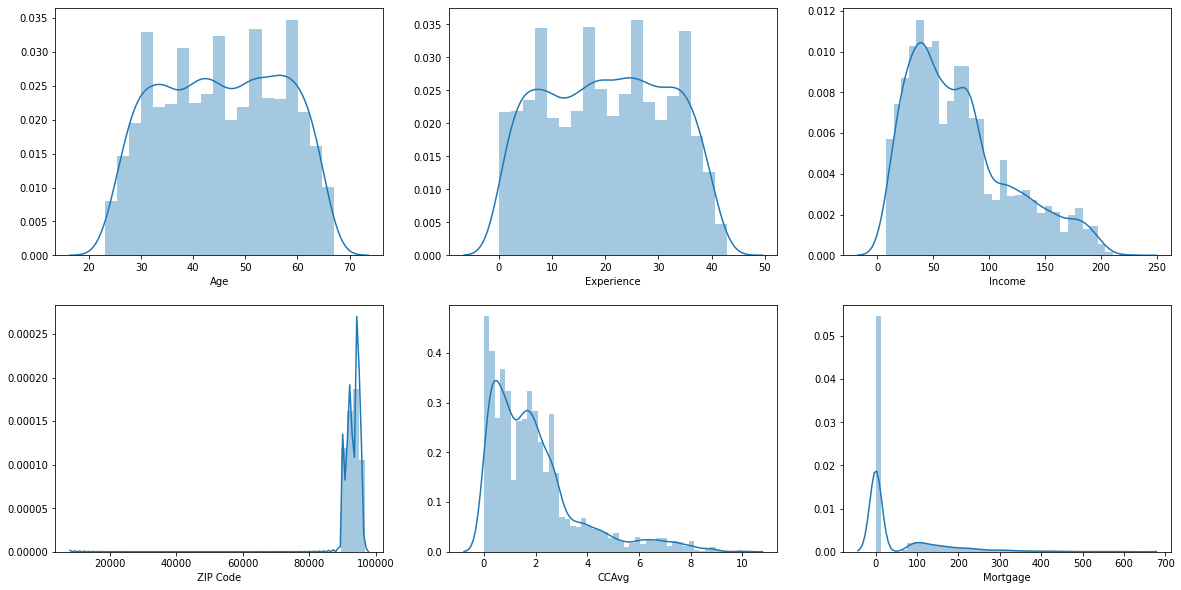

In [47]:
#continuous variables-
fig=plt.figure(figsize=(20,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(data[col])

In [48]:
"""
- We can see that Age and Experience are uniformaly distributed and show a good similarities in distribution.
- Income, CCAvg, Mortgage are positive Skew
- ZIP code is negative Skew or it contain values from single region.
- Mortgage contain most of the values as 0
"""

'\n- We can see that Age and Experience are uniformaly distributed and show a good similarities in distribution.\n- Income, CCAvg, Mortgage are positive Skew\n- ZIP code is negative Skew or it contain values from single region.\n- Mortgage contain most of the values as 0\n'

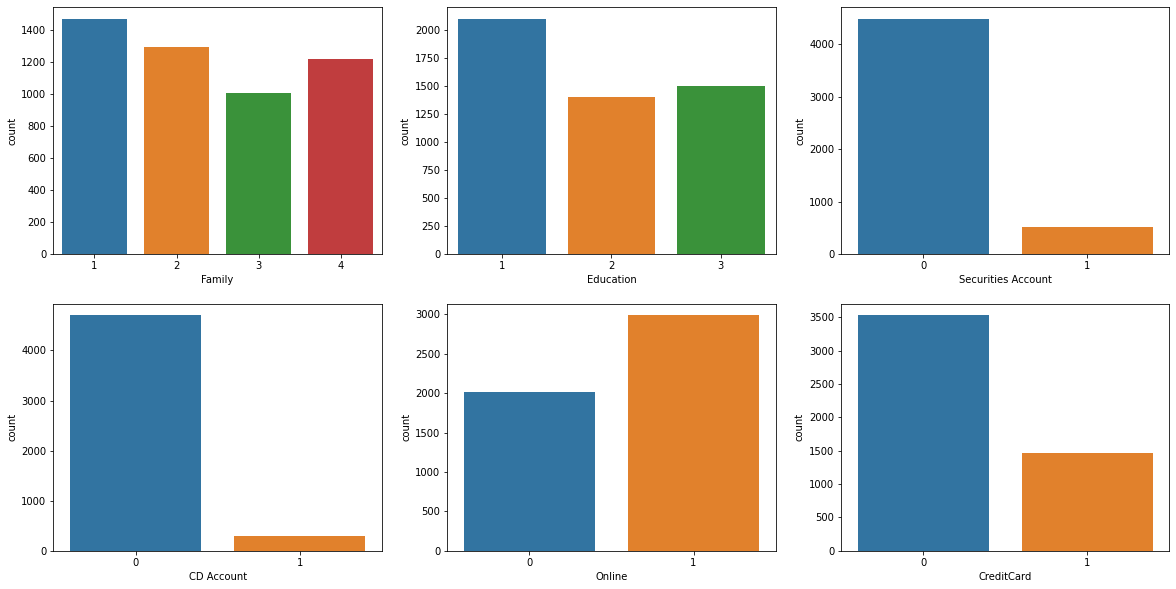

In [49]:
#categorical variables-
fig=plt.figure(figsize=(20,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(data[col])


In [50]:
"""
- Most of the customer doesn't have Securities Account, CD Account and CreditCard
- More number of customer use internet banking facilities.
- More number of customer are Undergrad and have family size one.
"""

"\n- Most of the customer doesn't have Securities Account, CD Account and CreditCard\n- More number of customer use internet banking facilities.\n- More number of customer are Undergrad and have family size one.\n"

In [51]:
#Bivariate Analysis:


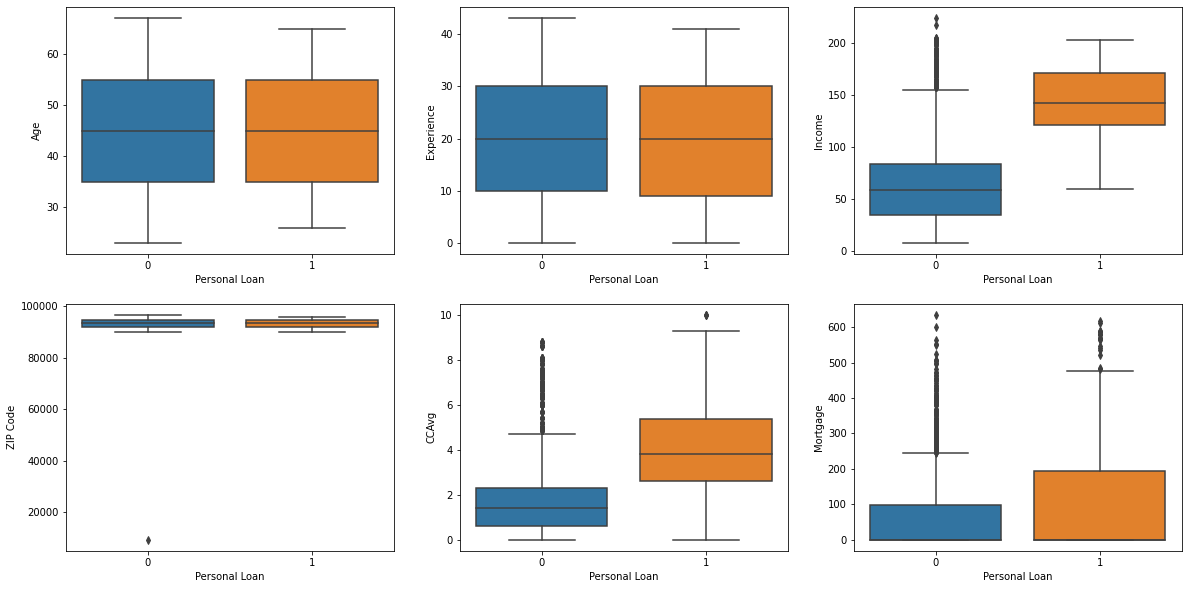

In [52]:
#Continuous variables-
# with respect to target value that is personal loan
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=data[col],x=data['Personal Loan'])

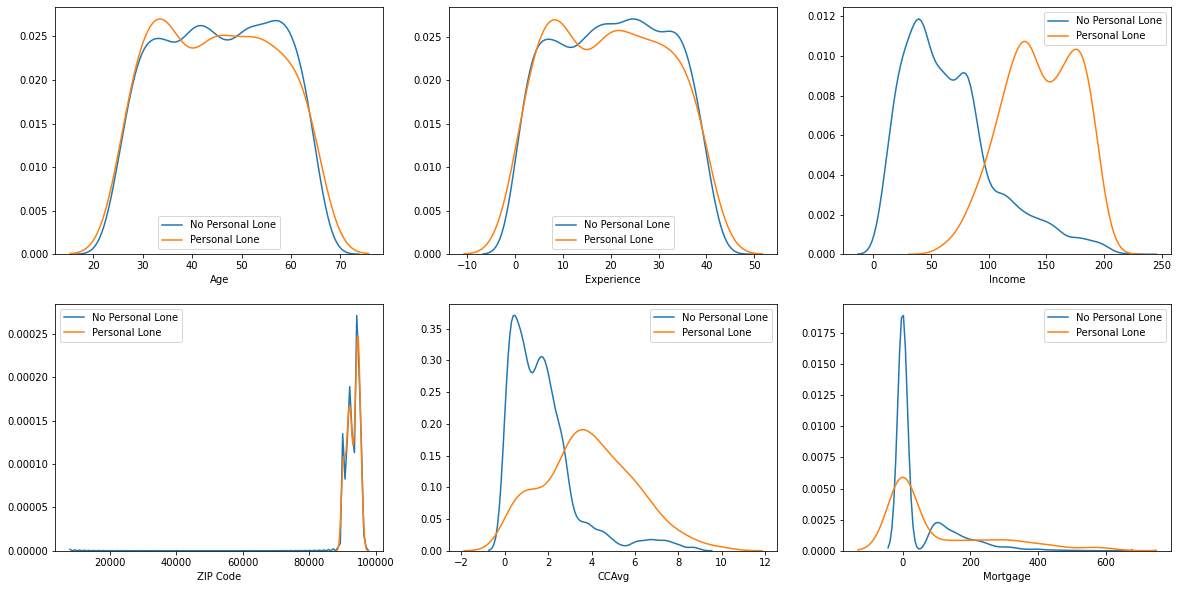

In [53]:
#showing comparission using line graph
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    ax1=sns.distplot(data[col][data['Personal Loan']==0],hist=False,label='No Personal Lone')
    sns.distplot(data[col][data['Personal Loan']==1],hist=False,ax=ax1,label='Personal Lone')

In [54]:
"""
- Personal Loan doesn't show variations with Age and Experience.
- Income has a good effect on Personal Loan Customers with High Income have more chances of having Personal Loan.
- CCAvg also show a good relationship with Personal Loan customers with personal loan have high Avg. spending on credit cards per month
- Customers want to have high Mortgage have opted for Personal Loan
"""

"\n- Personal Loan doesn't show variations with Age and Experience.\n- Income has a good effect on Personal Loan Customers with High Income have more chances of having Personal Loan.\n- CCAvg also show a good relationship with Personal Loan customers with personal loan have high Avg. spending on credit cards per month\n- Customers want to have high Mortgage have opted for Personal Loan\n"

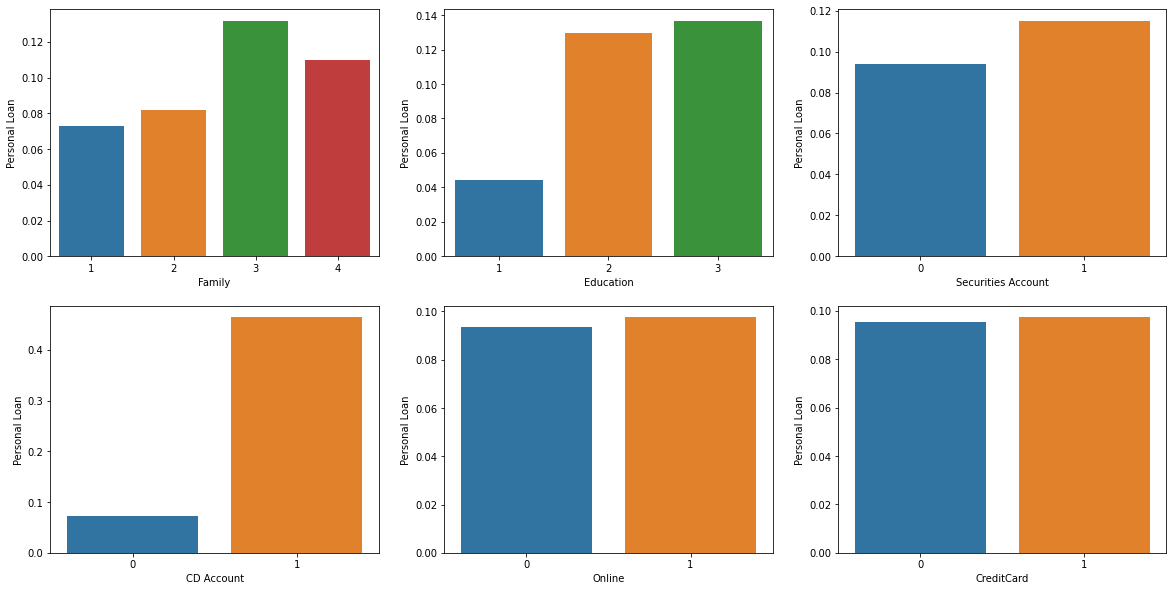

In [55]:
#Categorical Variables-
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal Loan',data=data,ci=None)

In [56]:
"""
- Customers with family size equal to 3 have more chances of having Personal Loan.
- Customers with Undergrad degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree
- Customers with CD Account and Securities Account have more chances of having Personal Loan.
- Customers using online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan
"""

"\n- Customers with family size equal to 3 have more chances of having Personal Loan.\n- Customers with Undergrad degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree\n- Customers with CD Account and Securities Account have more chances of having Personal Loan.\n- Customers using online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan\n"

In [57]:
#Income is a strong attribute which effect the chances of having Personl Loan High the Income High the chances of having Personal Loan. So we will analysise Income with other attributes

In [58]:
con=continuous_variables.copy()
con.remove('Income')

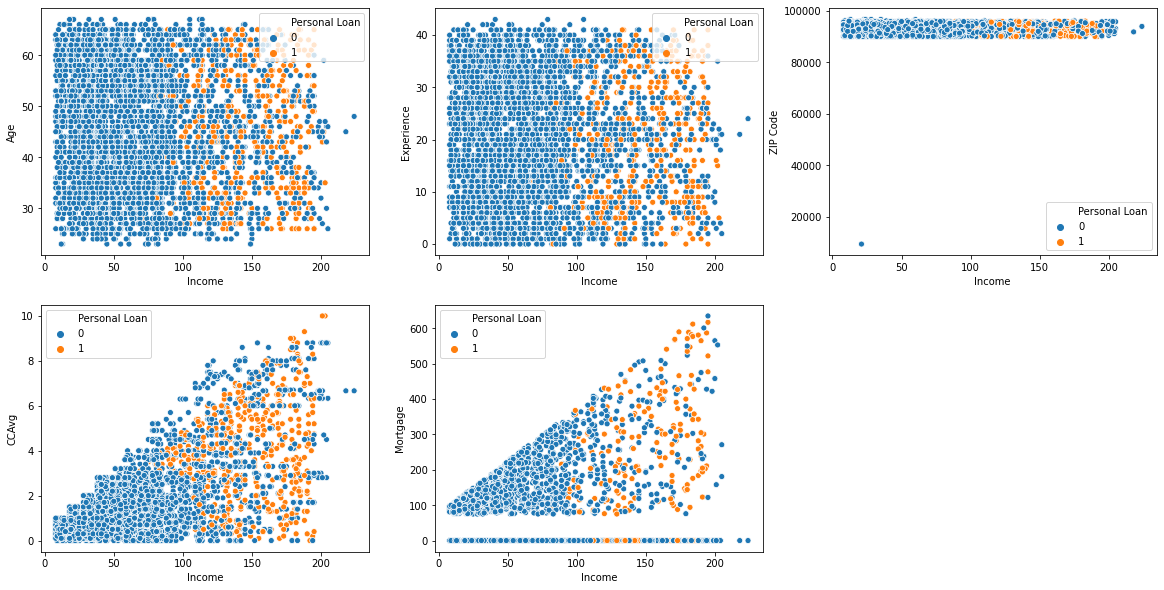

In [59]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot('Income',col,hue='Personal Loan',data=data)

In [60]:
"""
- Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.
- ZIP Code shows that all the customers are of particular area and they have no pattern in chances of having personal loan.
- Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high Value of house mortgage
"""

'\n- Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.\n- ZIP Code shows that all the customers are of particular area and they have no pattern in chances of having personal loan.\n- Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high Value of house mortgage\n'

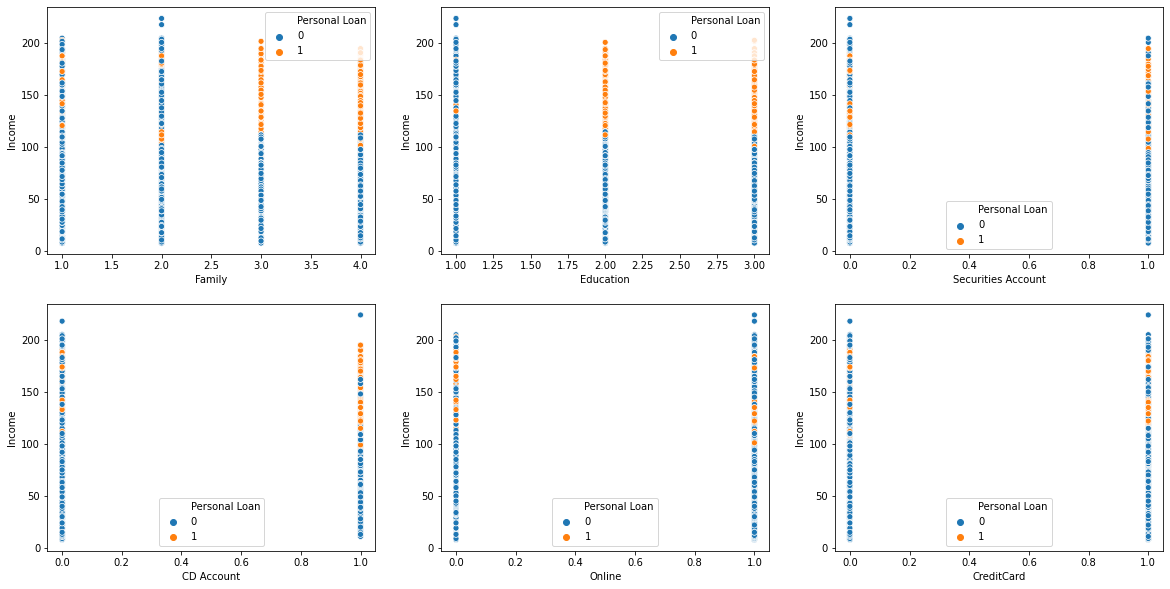

In [61]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'Income',hue='Personal Loan',data=data)

In [62]:
"""
- Customers with high Degrees and having family size greater then 3 with high income have personal loan.
- Customers with CD Accounts have chances of having Personal Loan.
"""

'\n- Customers with high Degrees and having family size greater then 3 with high income have personal loan.\n- Customers with CD Accounts have chances of having Personal Loan.\n'

In [63]:
#After income we will find relation of CCAvg with other attributes

In [64]:
con.remove('CCAvg')

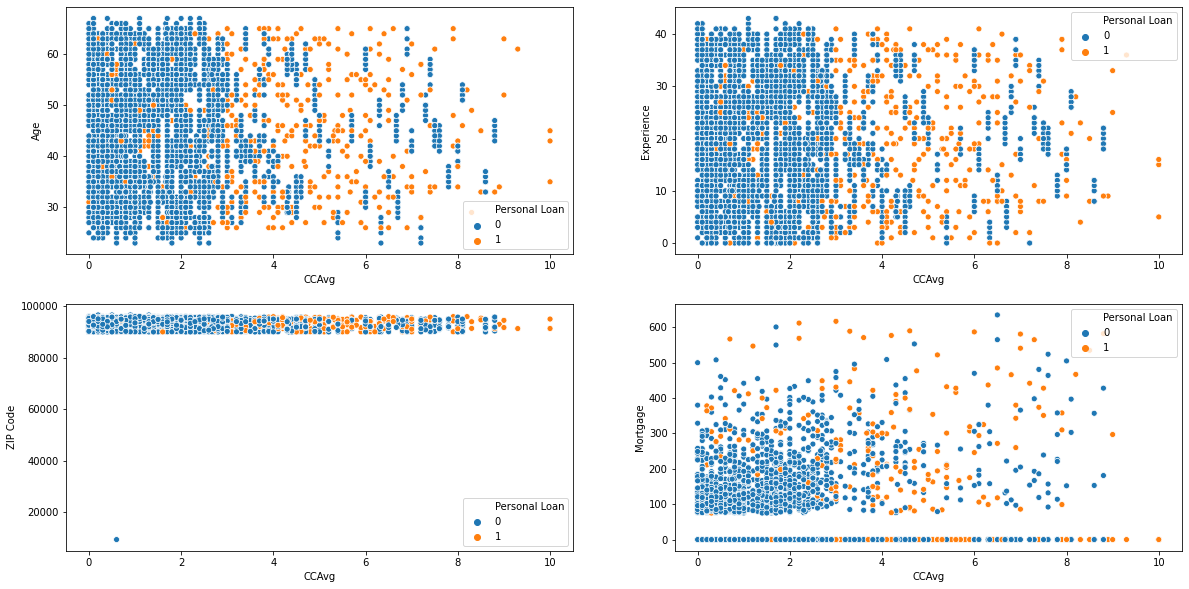

In [65]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,2,i+1)
    sns.scatterplot('CCAvg',col,hue='Personal Loan',data=data)

In [66]:
"""
- Age and Experience show same patterns on customers with personal loan or not.
- high CCAvg and Mortgage have more chances of customer having Personal Loan
"""

'\n- Age and Experience show same patterns on customers with personal loan or not.\n- high CCAvg and Mortgage have more chances of customer having Personal Loan\n'

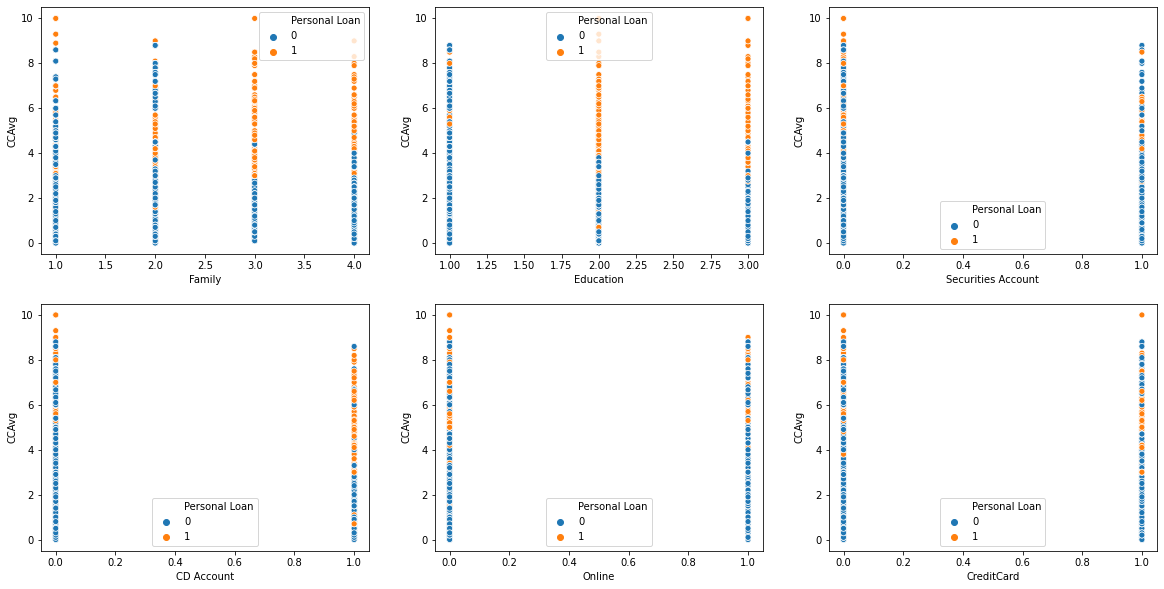

In [68]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'CCAvg',hue='Personal Loan',data=data)

In [69]:
"""
- CCAvg Shows similar trends as shown by Income
"""

'\n- CCAvg Shows similar trends as shown by Income\n'

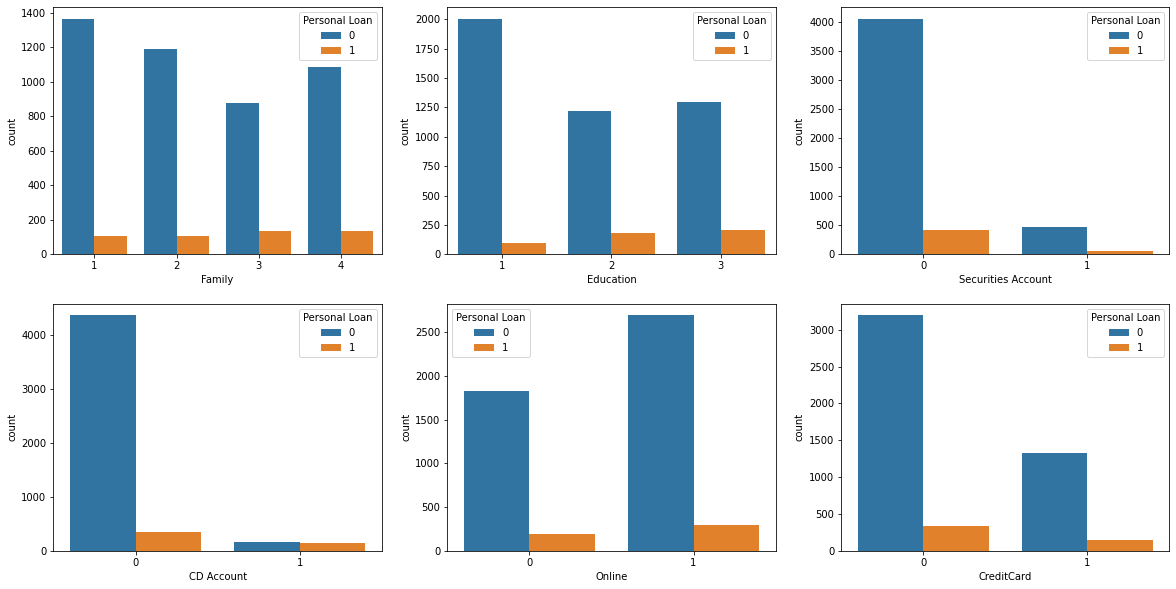

In [70]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(x=col,hue='Personal Loan',data=data)

In [71]:
"""
- these graph clearly depicts the facts that we had observed previously above like person with CD Account have more chances of having Personal Loan
"""

'\n- these graph clearly depicts the facts that we had observed previously above like person with CD Account have more chances of having Personal Loan\n'

In [72]:
#Feature Engineering


In [73]:
data.drop_duplicates(inplace=True)

In [75]:
data.shape

(5000, 14)

In [76]:
#Since there are no duplicate enteries or row in data so we can set ID as index of dataframe

In [77]:
data.set_index("ID",inplace=True)

In [78]:
#Since ZIP Code doesn't show any effect on the chances of Personal Loan it is better to remove it form our data

In [80]:
data.drop('ZIP Code',axis=1,inplace=True)

In [81]:
#Zip code contain data of particular area so it contain minimum variations so we removed it.

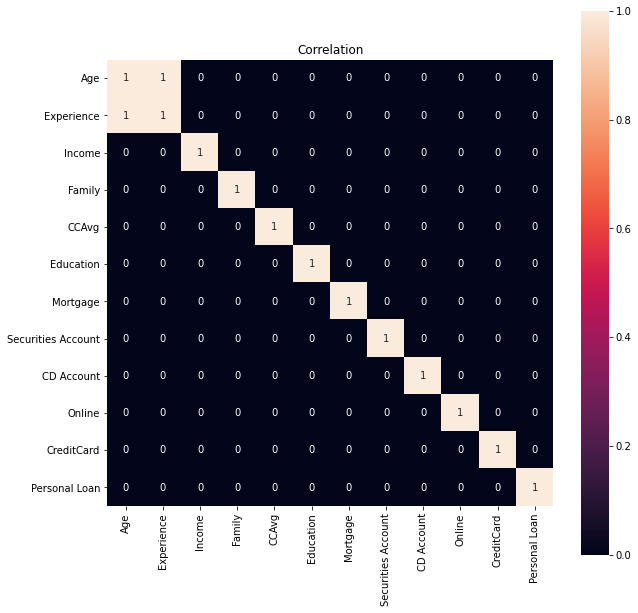

In [82]:
#Finding relationship between Experience and Age
corr=data.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr > 0.90, annot=True, square=True)

In [84]:
data[['Age','Experience','Personal Loan']].corr()

,Age,Experience,Personal Loan
Age,1.000000,0.994159,-0.007726
Experience,0.994159,1.000000,-0.011498
Personal Loan,-0.007726,-0.011498,1.000000


In [85]:
#since Age shows a little better correlation with Personal loan we will drop the Experience attribute

In [87]:
data.drop('Experience',axis=1,inplace=True)

In [88]:
"""
Creating Attributes

We will try to create a new feature Account contain 1 if any customer is having either CD Account or Security Account or zero if customer have none of them and will try to find its relation with target variable if it shows a better relation compaired to other two then we will keep it otherwise we will remove it
"""

'\nCreating Attributes\n\nWe will try to create a new feature Account contain 1 if any customer is having either CD Account or Security Account or zero if customer have none of them and will try to find its relation with target variable if it shows a better relation compaired to other two then we will keep it otherwise we will remove it\n'

In [89]:
data['Account']=data['CD Account']+data['Securities Account']

In [90]:
data[['CD Account','Securities Account','Account','Personal Loan']].corr()

,CD Account,Securities Account,Account,Personal Loan
CD Account,1.000000,0.317034,0.756219,0.316355
Securities Account,0.317034,1.000000,0.860312,0.021954
Account,0.756219,0.860312,1.000000,0.185185
Personal Loan,0.316355,0.021954,0.185185,1.000000


In [91]:
#Since it shows a week correlation as compaired to CD Account we will drop it

In [92]:
data.drop('Account',axis=1,inplace=True)

In [93]:
#we will now try to create a attribute facilities which will contain 1 if customer uses the bank facilities like online banking or credit card else it will contain 0 and then we will check for relation with the target variable if it is better then the previous one we will keep that attribute

In [94]:
data['Facilities']=data['Online']+data['CreditCard']

In [95]:
data[['Facilities','Online','CreditCard','Personal Loan']].corr()

,Facilities,Online,CreditCard,Personal Loan
Facilities,1.000000,0.734052,0.682178,0.006493
Online,0.734052,1.000000,0.004210,0.006278
CreditCard,0.682178,0.004210,1.000000,0.002802
Personal Loan,0.006493,0.006278,0.002802,1.000000


In [96]:
#We will keep the Facilities attribute and drop the Online and CreditCard attributes

In [97]:
data.drop(['Online','CreditCard'],axis=1,inplace=True)

In [98]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Personal Loan,Facilities
ID,,,,,,,,,,
1,25,49,4,1.6,1,0,1,0,0,0
2,45,34,3,1.5,1,0,1,0,0,0
3,39,11,1,1.0,1,0,0,0,0,0
4,35,100,1,2.7,2,0,0,0,0,0
5,35,45,4,1.0,2,0,0,0,0,1


In [99]:
#Applying Scaling


In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [101]:
scaled_df=scaler.fit_transform(data.drop('Personal Loan',axis=1))

In [102]:
scaled_df=pd.DataFrame(scaled_df)

In [103]:
scaled_df.columns=data.drop('Personal Loan',axis=1).columns
scaled_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Facilities
0,-1.774417,-0.538229,1.397414,-0.193371,-1.049078,-0.555524,2.928915,-0.25354,-1.327815
1,-0.029524,-0.864109,0.525991,-0.250595,-1.049078,-0.555524,2.928915,-0.25354,-1.327815
2,-0.552992,-1.363793,-1.216855,-0.536720,-1.049078,-0.555524,-0.341423,-0.25354,-1.327815
3,-0.901970,0.569765,-1.216855,0.436103,0.141703,-0.555524,-0.341423,-0.25354,-1.327815
4,-0.901970,-0.625130,1.397414,-0.536720,0.141703,-0.555524,-0.341423,-0.25354,0.162772


In [104]:
#Developing Models

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [106]:
X=scaled_df
y=data['Personal Loan']

In [107]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [108]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

In [109]:
#Logistic Regression
model_list.append('LogisticRegression')
lm=LogisticRegression()

In [110]:
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
yhat_lm=lm.predict(x_test)

In [112]:
lm_score=f1_score(y_test,yhat_lm)
model_f1_score.append(lm_score)
lm_score

0.6793893129770991

In [113]:
lm_accuracy=accuracy_score(y_test,yhat_lm)
model_accuracy_score.append(lm_accuracy)
lm_accuracy

0.944

In [114]:
print(classification_report(y_test,yhat_lm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.86      0.56      0.68       158

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



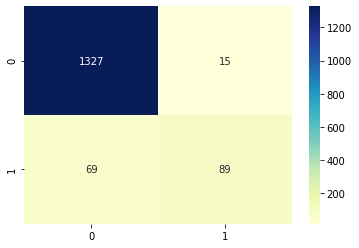

In [115]:
sns.heatmap(confusion_matrix(y_test,yhat_lm),annot=True,fmt='',cmap='YlGnBu')

In [116]:
#DecisionTreeClassifier
model_list.append('DecisionTreeClassifier')
tree=DecisionTreeClassifier()

In [117]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [118]:
yhat_tree=tree.predict(x_test)

In [119]:
tree_score=f1_score(y_test,yhat_tree)
model_f1_score.append(tree_score)
tree_score

0.9166666666666666

In [120]:
tree_accuracy=accuracy_score(y_test,yhat_tree)
model_accuracy_score.append(tree_accuracy)
tree_accuracy

0.9826666666666667

In [121]:
print(classification_report(y_test,yhat_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.93      0.91      0.92       158

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



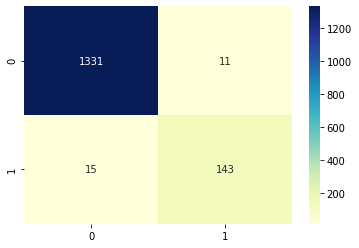

In [122]:
sns.heatmap(confusion_matrix(y_test,yhat_tree),annot=True,fmt='',cmap='YlGnBu')

In [123]:
#RandomForestClassifier

In [124]:
model_list.append('RandomForestClassifier')
forest=RandomForestClassifier()

In [125]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
yhat_forest=forest.predict(x_test)

In [127]:
forest_score=f1_score(y_test,yhat_forest)
model_f1_score.append(forest_score)
forest_score

0.9235880398671097

In [128]:
forest_accuracy=accuracy_score(y_test,yhat_forest)
model_accuracy_score.append(forest_accuracy)
forest_accuracy

0.9846666666666667

In [129]:
print(classification_report(y_test,yhat_forest))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1342
           1       0.97      0.88      0.92       158

    accuracy                           0.98      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.98      0.98      0.98      1500



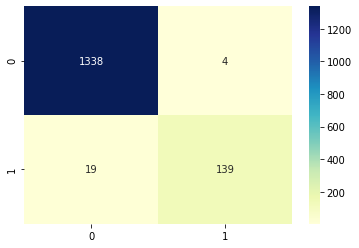

In [130]:
sns.heatmap(confusion_matrix(y_test,yhat_forest),annot=True,fmt='',cmap='YlGnBu')


In [131]:
#SVC


In [132]:
model_list.append('SVC')
svc=SVC()

In [133]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [134]:
yhat_svc=svc.predict(x_test)

In [135]:
svc_score=f1_score(y_test,yhat_svc)
model_f1_score.append(svc_score)
svc_score

0.8327402135231317

In [136]:
svc_accuracy=accuracy_score(y_test,yhat_svc)
model_accuracy_score.append(svc_accuracy)
svc_accuracy

0.9686666666666667

In [137]:
print(classification_report(y_test,yhat_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1342
           1       0.95      0.74      0.83       158

    accuracy                           0.97      1500
   macro avg       0.96      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



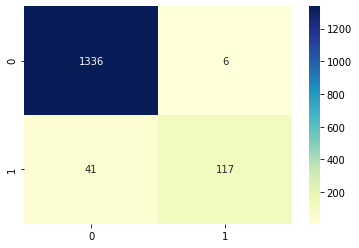

In [138]:
sns.heatmap(confusion_matrix(y_test,yhat_svc),annot=True,fmt='',cmap='YlGnBu')

In [139]:
#KNeighborsClassifier

In [140]:
model_list.append('KNeighborsClassifier')
neighbour=KNeighborsClassifier()

In [141]:
neighbour.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [142]:
yhat_neighbour=neighbour.predict(x_test)

In [143]:
neighbour_score=f1_score(y_test,yhat_neighbour)
model_f1_score.append(neighbour_score)
neighbour_score

0.7838827838827838

In [144]:
neighbour_accuracy=accuracy_score(y_test,yhat_neighbour)
model_accuracy_score.append(neighbour_accuracy)
neighbour_accuracy

0.9606666666666667

In [145]:
print(classification_report(y_test,yhat_neighbour))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1342
           1       0.93      0.68      0.78       158

    accuracy                           0.96      1500
   macro avg       0.95      0.84      0.88      1500
weighted avg       0.96      0.96      0.96      1500



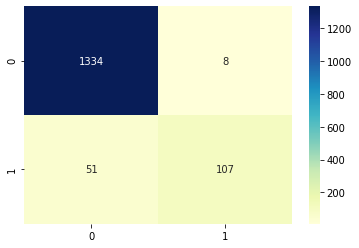

In [146]:
sns.heatmap(confusion_matrix(y_test,yhat_neighbour),annot=True,fmt='',cmap='YlGnBu')

In [147]:
#Ploting the Results

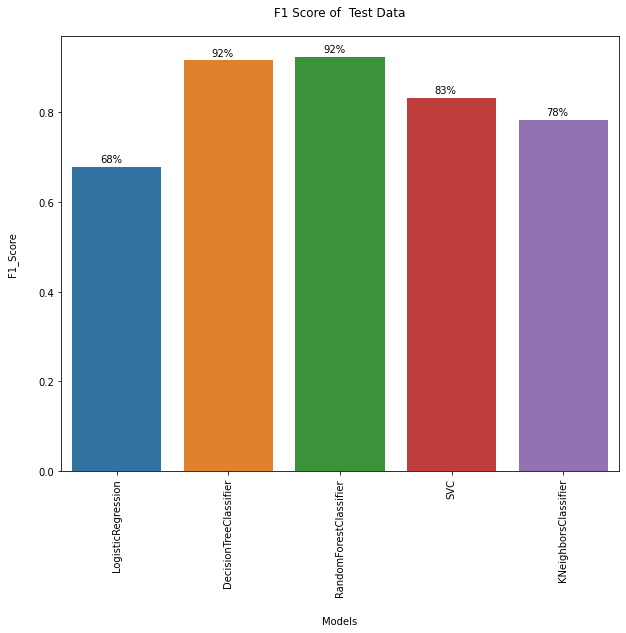

In [148]:
#F1-Score
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model_list,model_f1_score)
ax.set_title("F1 Score of  Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("F1_Score",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

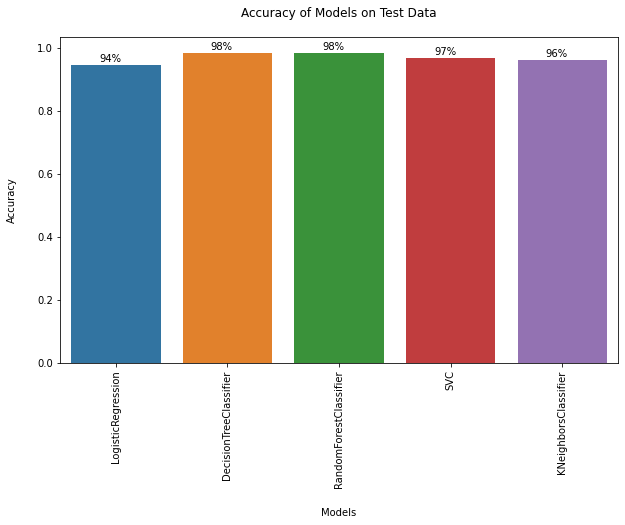

In [149]:
#Accuracy Score
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(model_list,model_accuracy_score)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

In [ ]:
#Conclusion
#Among the 5 models that we have implemented DecisionTreeClassifier and RandomForestClassifier gives the same and best F1 Score and accuracy score with almost accuracy of 98% and F1-Score of 91%